In [49]:
%matplotlib inline
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

df = pd.read_csv('weatherAUS.csv')
df.shape

(145460, 23)

In [50]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtype)
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

datetime64[ns]


In [51]:
month_avgs = df.groupby(['Location', 'Month']).mean(numeric_only=True)
month_cols = ['Monthly' + c for c in month_avgs.columns]
month_avgs.columns = month_cols
month_avgs.head()


MonthlyMinTemp  MonthlyMaxTemp  MonthlyRainfall  \
Location Month                                                    
Adelaide 1           18.062007       30.954122         0.769118   
         2           17.835841       30.053540         1.005357   
         3           15.954480       27.105735         1.187407   
         4           12.934167       23.317083         1.416102   
         5           10.739427       19.183513         2.216988   

                MonthlyEvaporation  MonthlySunshine  MonthlyWindGustSpeed  \
Location Month                                                              
Adelaide 1               11.885915        11.178488             38.931900   
         2                9.598374         9.651079             37.243243   
         3                6.986395         8.260109             35.176471   
         4                4.846957         7.357778             32.474790   
         5                2.396104         5.288525             31.545126   

                MonthlyWindSpeed9am  MonthlyWindSpeed3pm  MonthlyHumidity9am  \
Location Month                                                                 
Adelaide 1                 9.935484            16.379061           47.273381   
         2                 8.805310            15.765487           51.685841   
         3                 8.028674            15.050360           59.340502   
         4                 8.441667            14.016736           58.779167   
         5                 8.035842            12.597122           68.146953   

                MonthlyHumidity3pm  MonthlyPressure9am  MonthlyPressure3pm  \
Location Month                                                               
Adelaide 1               32.452899         1013.725448         1011.937906   
         2               35.411504         1015.583186         1013.938938   
         3               40.311828         1017.913043         1016.174275   
         4               43.853556         1021.398750         1018.993724   
         5               53.755396         1021.917921         1019.690288   

                MonthlyCloud9am  MonthlyCloud3pm  MonthlyTemp9am  \
Location Month                                                     
Adelaide 1                  NaN              NaN       23.029496   
         2                  NaN              NaN       22.136283   
         3                  NaN              NaN       19.443728   
         4                  NaN              NaN       17.795000   
         5                  NaN              NaN       14.591398   

                MonthlyTemp3pm  MonthlyDay  MonthlyDayOfWeek  
Location Month                                                
Adelaide 1           29.314440   16.000000          3.046595  
         2           28.417257   14.628319          2.982301  
         3           25.665591   16.000000          2.982079  
         4           22.114226   15.500000          2.995833  
         5           18.151439   16.000000          3.014337

In [52]:
print(df.shape)
df = df.merge(month_avgs, how='inner', left_on=['Location', 'Month'], right_index=True)
print(df.shape)
df.head()

(145460, 26)
(145460, 44)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,MonthlyHumidity9am,MonthlyHumidity3pm,MonthlyPressure9am,MonthlyPressure3pm,MonthlyCloud9am,MonthlyCloud3pm,MonthlyTemp9am,MonthlyTemp3pm,MonthlyDay,MonthlyDayOfWeek
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,56.298387,33.516129,1012.926613,1010.204839,5.539683,4.901099,20.587097,27.458871,16.0,2.943548
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,56.298387,33.516129,1012.926613,1010.204839,5.539683,4.901099,20.587097,27.458871,16.0,2.943548
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,56.298387,33.516129,1012.926613,1010.204839,5.539683,4.901099,20.587097,27.458871,16.0,2.943548
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,56.298387,33.516129,1012.926613,1010.204839,5.539683,4.901099,20.587097,27.458871,16.0,2.943548
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,56.298387,33.516129,1012.926613,1010.204839,5.539683,4.901099,20.587097,27.458871,16.0,2.943548


In [53]:
df['RainToday'] = df['RainToday'].replace(('Yes', 'No'), (1, 0))
df['RainTomorrow'] = df['RainTomorrow'].replace(('Yes', 'No'), (1, 0))
df.head()

C:\Users\cappr\AppData\Local\Temp\ipykernel_15128\4238110154.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace(('Yes', 'No'), (1, 0))
C:\Users\cappr\AppData\Local\Temp\ipykernel_15128\4238110154.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainTomorrow'] = df['RainTomorrow'].replace(('Yes', 'No'), (1, 0))


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,MonthlyHumidity9am,MonthlyHumidity3pm,MonthlyPressure9am,MonthlyPressure3pm,MonthlyCloud9am,MonthlyCloud3pm,MonthlyTemp9am,MonthlyTemp3pm,MonthlyDay,MonthlyDayOfWeek
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,56.298387,33.516129,1012.926613,1010.204839,5.539683,4.901099,20.587097,27.458871,16.0,2.943548
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,56.298387,33.516129,1012.926613,1010.204839,5.539683,4.901099,20.587097,27.458871,16.0,2.943548
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,56.298387,33.516129,1012.926613,1010.204839,5.539683,4.901099,20.587097,27.458871,16.0,2.943548
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,56.298387,33.516129,1012.926613,1010.204839,5.539683,4.901099,20.587097,27.458871,16.0,2.943548
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,56.298387,33.516129,1012.926613,1010.204839,5.539683,4.901099,20.587097,27.458871,16.0,2.943548


In [54]:
index = pd.MultiIndex.from_frame(df[['Location', 'Date']])
df.index = index
df = df.sort_index()
df['RainPast5Days'] = df['RainToday'].rolling(5).sum()
df['AvgMaxTemp5Days'] = df['MaxTemp'].rolling(5).mean()
df['AvgSunshine5Days'] = df['Sunshine'].rolling(5).mean()
df['AvgRainfall5Days'] = df['Rainfall'].rolling(5).mean()

In [55]:
train_cols = df.columns[~df.columns.isin(['Date', 'RainTomorrow'])]
train_cols                   

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Month', 'Day', 'DayOfWeek', 'MonthlyMinTemp',
       'MonthlyMaxTemp', 'MonthlyRainfall', 'MonthlyEvaporation',
       'MonthlySunshine', 'MonthlyWindGustSpeed', 'MonthlyWindSpeed9am',
       'MonthlyWindSpeed3pm', 'MonthlyHumidity9am', 'MonthlyHumidity3pm',
       'MonthlyPressure9am', 'MonthlyPressure3pm', 'MonthlyCloud9am',
       'MonthlyCloud3pm', 'MonthlyTemp9am', 'MonthlyTemp3pm', 'MonthlyDay',
       'MonthlyDayOfWeek', 'RainPast5Days', 'AvgMaxTemp5Days',
       'AvgSunshine5Days', 'AvgRainfall5Days'],
      dtype='object')

In [56]:
df[train_cols].dtypes

Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday               float64
Month                     int32
Day                       int32
DayOfWeek                 int32
MonthlyMinTemp          float64
MonthlyMaxTemp          float64
MonthlyRainfall         float64
MonthlyEvaporation      float64
MonthlySunshine         float64
MonthlyWindGustSpeed    float64
MonthlyWindSpeed9am     float64
MonthlyW

In [57]:
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [58]:
df =df[~df['RainTomorrow'].isnull()]

In [59]:
from sklearn.model_selection import train_test_split
df_X, df_test, y, y_test = train_test_split(df, df['RainTomorrow'].values, 
                        stratify=df['RainTomorrow'], test_size=0.15)
X = df_X[train_cols]
test = df_test[train_cols]

In [60]:
#!pip install xgboost

In [61]:
#!pip install catboost

In [62]:
from sklearn.pipeline import make_pipeline
from feature_engine.encoding import OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
model =  make_pipeline(OrdinalEncoder(encoding_method='arbitrary', missing_values='ignore', variables=categorical_cols),
                    CatBoostClassifier(iterations=1000,
                                      learning_rate=0.09,
                                        depth=10,
                                      loss_function= "Logloss"))
model.fit(X, y)

C:\Users\cappr\AppData\Local\Programs\Python\Python310\lib\site-packages\feature_engine\encoding\base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) WindGustDir, WindDir9am, WindDir3pm.
  warnings.warn(


0:	learn: 0.6226124	total: 123ms	remaining: 2m 3s
1:	learn: 0.5707082	total: 239ms	remaining: 1m 59s
2:	learn: 0.5287771	total: 381ms	remaining: 2m 6s
3:	learn: 0.4985148	total: 599ms	remaining: 2m 29s
4:	learn: 0.4707481	total: 821ms	remaining: 2m 43s
5:	learn: 0.4491361	total: 1.04s	remaining: 2m 52s
6:	learn: 0.4315438	total: 1.26s	remaining: 2m 59s
7:	learn: 0.4173488	total: 1.48s	remaining: 3m 3s
8:	learn: 0.4057635	total: 1.67s	remaining: 3m 4s
9:	learn: 0.3965676	total: 1.91s	remaining: 3m 8s
10:	learn: 0.3883801	total: 2.13s	remaining: 3m 11s
11:	learn: 0.3816552	total: 2.35s	remaining: 3m 13s
12:	learn: 0.3757962	total: 2.54s	remaining: 3m 13s
13:	learn: 0.3711226	total: 2.75s	remaining: 3m 13s
14:	learn: 0.3668281	total: 2.95s	remaining: 3m 14s
15:	learn: 0.3635422	total: 3.17s	remaining: 3m 14s
16:	learn: 0.3599878	total: 3.37s	remaining: 3m 14s
17:	learn: 0.3569234	total: 3.58s	remaining: 3m 15s
18:	learn: 0.3539441	total: 3.83s	remaining: 3m 17s
19:	learn: 0.3513453	total:

160:	learn: 0.2671881	total: 22.2s	remaining: 1m 55s
161:	learn: 0.2668202	total: 22.3s	remaining: 1m 55s
162:	learn: 0.2664894	total: 22.4s	remaining: 1m 55s
163:	learn: 0.2660091	total: 22.5s	remaining: 1m 54s
164:	learn: 0.2655392	total: 22.7s	remaining: 1m 54s
165:	learn: 0.2651489	total: 22.8s	remaining: 1m 54s
166:	learn: 0.2648560	total: 22.9s	remaining: 1m 54s
167:	learn: 0.2644454	total: 23s	remaining: 1m 54s
168:	learn: 0.2641222	total: 23.1s	remaining: 1m 53s
169:	learn: 0.2635036	total: 23.3s	remaining: 1m 53s
170:	learn: 0.2630670	total: 23.4s	remaining: 1m 53s
171:	learn: 0.2627075	total: 23.5s	remaining: 1m 53s
172:	learn: 0.2622767	total: 23.6s	remaining: 1m 52s
173:	learn: 0.2618581	total: 23.7s	remaining: 1m 52s
174:	learn: 0.2613042	total: 23.9s	remaining: 1m 52s
175:	learn: 0.2609988	total: 24s	remaining: 1m 52s
176:	learn: 0.2605246	total: 24.1s	remaining: 1m 52s
177:	learn: 0.2601678	total: 24.2s	remaining: 1m 51s
178:	learn: 0.2596687	total: 24.3s	remaining: 1m 5

316:	learn: 0.2157207	total: 40.5s	remaining: 1m 27s
317:	learn: 0.2154046	total: 40.6s	remaining: 1m 27s
318:	learn: 0.2152006	total: 40.7s	remaining: 1m 26s
319:	learn: 0.2148703	total: 40.8s	remaining: 1m 26s
320:	learn: 0.2147016	total: 40.9s	remaining: 1m 26s
321:	learn: 0.2143638	total: 41.1s	remaining: 1m 26s
322:	learn: 0.2141208	total: 41.2s	remaining: 1m 26s
323:	learn: 0.2138422	total: 41.3s	remaining: 1m 26s
324:	learn: 0.2135670	total: 41.4s	remaining: 1m 26s
325:	learn: 0.2131320	total: 41.5s	remaining: 1m 25s
326:	learn: 0.2129457	total: 41.7s	remaining: 1m 25s
327:	learn: 0.2126648	total: 41.8s	remaining: 1m 25s
328:	learn: 0.2123429	total: 41.9s	remaining: 1m 25s
329:	learn: 0.2121970	total: 42s	remaining: 1m 25s
330:	learn: 0.2115861	total: 42.2s	remaining: 1m 25s
331:	learn: 0.2113996	total: 42.3s	remaining: 1m 25s
332:	learn: 0.2111522	total: 42.4s	remaining: 1m 24s
333:	learn: 0.2107999	total: 42.5s	remaining: 1m 24s
334:	learn: 0.2105612	total: 42.6s	remaining: 1m

472:	learn: 0.1772291	total: 58.9s	remaining: 1m 5s
473:	learn: 0.1770151	total: 59s	remaining: 1m 5s
474:	learn: 0.1768228	total: 59.2s	remaining: 1m 5s
475:	learn: 0.1765229	total: 59.3s	remaining: 1m 5s
476:	learn: 0.1763920	total: 59.4s	remaining: 1m 5s
477:	learn: 0.1761240	total: 59.5s	remaining: 1m 5s
478:	learn: 0.1759994	total: 59.6s	remaining: 1m 4s
479:	learn: 0.1758294	total: 59.8s	remaining: 1m 4s
480:	learn: 0.1756446	total: 59.9s	remaining: 1m 4s
481:	learn: 0.1754527	total: 1m	remaining: 1m 4s
482:	learn: 0.1752706	total: 1m	remaining: 1m 4s
483:	learn: 0.1751181	total: 1m	remaining: 1m 4s
484:	learn: 0.1749060	total: 1m	remaining: 1m 4s
485:	learn: 0.1746653	total: 1m	remaining: 1m 3s
486:	learn: 0.1743215	total: 1m	remaining: 1m 3s
487:	learn: 0.1741655	total: 1m	remaining: 1m 3s
488:	learn: 0.1739354	total: 1m	remaining: 1m 3s
489:	learn: 0.1736353	total: 1m	remaining: 1m 3s
490:	learn: 0.1735058	total: 1m 1s	remaining: 1m 3s
491:	learn: 0.1733457	total: 1m 1s	remain

630:	learn: 0.1472864	total: 1m 17s	remaining: 45.3s
631:	learn: 0.1471477	total: 1m 17s	remaining: 45.2s
632:	learn: 0.1469276	total: 1m 17s	remaining: 45.1s
633:	learn: 0.1467087	total: 1m 17s	remaining: 45s
634:	learn: 0.1465352	total: 1m 17s	remaining: 44.8s
635:	learn: 0.1463375	total: 1m 18s	remaining: 44.7s
636:	learn: 0.1461442	total: 1m 18s	remaining: 44.6s
637:	learn: 0.1460228	total: 1m 18s	remaining: 44.4s
638:	learn: 0.1458295	total: 1m 18s	remaining: 44.3s
639:	learn: 0.1456576	total: 1m 18s	remaining: 44.2s
640:	learn: 0.1455863	total: 1m 18s	remaining: 44.1s
641:	learn: 0.1454375	total: 1m 18s	remaining: 43.9s
642:	learn: 0.1452632	total: 1m 18s	remaining: 43.8s
643:	learn: 0.1451424	total: 1m 19s	remaining: 43.7s
644:	learn: 0.1449961	total: 1m 19s	remaining: 43.6s
645:	learn: 0.1448438	total: 1m 19s	remaining: 43.4s
646:	learn: 0.1445732	total: 1m 19s	remaining: 43.3s
647:	learn: 0.1444605	total: 1m 19s	remaining: 43.2s
648:	learn: 0.1442860	total: 1m 19s	remaining: 4

786:	learn: 0.1228567	total: 1m 37s	remaining: 26.3s
787:	learn: 0.1225968	total: 1m 37s	remaining: 26.2s
788:	learn: 0.1224000	total: 1m 37s	remaining: 26.1s
789:	learn: 0.1223218	total: 1m 37s	remaining: 26s
790:	learn: 0.1221944	total: 1m 37s	remaining: 25.8s
791:	learn: 0.1221240	total: 1m 37s	remaining: 25.7s
792:	learn: 0.1220072	total: 1m 38s	remaining: 25.6s
793:	learn: 0.1219063	total: 1m 38s	remaining: 25.5s
794:	learn: 0.1216560	total: 1m 38s	remaining: 25.4s
795:	learn: 0.1214982	total: 1m 38s	remaining: 25.2s
796:	learn: 0.1213424	total: 1m 38s	remaining: 25.1s
797:	learn: 0.1212597	total: 1m 38s	remaining: 25s
798:	learn: 0.1211690	total: 1m 38s	remaining: 24.9s
799:	learn: 0.1209276	total: 1m 39s	remaining: 24.8s
800:	learn: 0.1207667	total: 1m 39s	remaining: 24.6s
801:	learn: 0.1205607	total: 1m 39s	remaining: 24.5s
802:	learn: 0.1204543	total: 1m 39s	remaining: 24.4s
803:	learn: 0.1202593	total: 1m 39s	remaining: 24.3s
804:	learn: 0.1200523	total: 1m 39s	remaining: 24.

942:	learn: 0.1029220	total: 1m 57s	remaining: 7.08s
943:	learn: 0.1028031	total: 1m 57s	remaining: 6.95s
944:	learn: 0.1026726	total: 1m 57s	remaining: 6.83s
945:	learn: 0.1025826	total: 1m 57s	remaining: 6.7s
946:	learn: 0.1024131	total: 1m 57s	remaining: 6.58s
947:	learn: 0.1022831	total: 1m 57s	remaining: 6.45s
948:	learn: 0.1021835	total: 1m 57s	remaining: 6.33s
949:	learn: 0.1020345	total: 1m 57s	remaining: 6.21s
950:	learn: 0.1019375	total: 1m 58s	remaining: 6.08s
951:	learn: 0.1018549	total: 1m 58s	remaining: 5.96s
952:	learn: 0.1017112	total: 1m 58s	remaining: 5.83s
953:	learn: 0.1016243	total: 1m 58s	remaining: 5.71s
954:	learn: 0.1014594	total: 1m 58s	remaining: 5.58s
955:	learn: 0.1013816	total: 1m 58s	remaining: 5.46s
956:	learn: 0.1012358	total: 1m 58s	remaining: 5.33s
957:	learn: 0.1011227	total: 1m 58s	remaining: 5.21s
958:	learn: 0.1010073	total: 1m 58s	remaining: 5.09s
959:	learn: 0.1008976	total: 1m 59s	remaining: 4.96s
960:	learn: 0.1008347	total: 1m 59s	remaining: 

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                missing_values='ignore',
                                variables=['Location', 'WindGustDir',
                                           'WindDir9am', 'WindDir3pm'])),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x000001C4015BAA10>)])

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# spliting training and test data
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(df, df['RainTomorrow'].values, test_size=0.2, random_state=1234)

# getting only columns that are important for the model
X_train_xgb = X_train_xgb[train_cols]
X_test_xgb = X_test_xgb[train_cols]

# getting names of numerical columns
numerical_cols = [col for col in X_train_xgb.columns if col not in categorical_cols]

# setting up data for scalling using only numerical columns 
X_train_num = X_train_xgb[numerical_cols]
X_test_num = X_test_xgb[numerical_cols]

# scalling data
sc = StandardScaler()
X_train_num = sc.fit_transform(X_train_num)
X_test_num = sc.transform(X_test_num)


# converting numpy array to datafreame 
X_train_scaled_df = pd.DataFrame(X_train_num, columns=numerical_cols, index=X_train_xgb.index)
X_test_scaled_df = pd.DataFrame(X_test_num, columns=numerical_cols, index=X_test_xgb.index)

# adding both scaled numeric data and categorical data to my final df
X_train_xgb = pd.concat([X_train_scaled_df, X_train_xgb[categorical_cols]], axis=1)
X_test_xgb = pd.concat([X_test_scaled_df, X_test_xgb[categorical_cols]], axis=1)

# actual model with encoder
model_xgb =  make_pipeline(OrdinalEncoder(encoding_method='arbitrary', missing_values='ignore', variables=categorical_cols),
                    XGBClassifier(n_estimators=1000, 
                                  learning_rate=0.09, 
                                  max_depth=10,
                                  random_state=42))
# training the model
model_xgb.fit(X_train_xgb, y_train_xgb)


C:\Users\cappr\AppData\Local\Programs\Python\Python310\lib\site-packages\feature_engine\encoding\base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) WindGustDir, WindDir9am, WindDir3pm.
  warnings.warn(


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                missing_values='ignore',
                                variables=['Location', 'WindGustDir',
                                           'WindDir9am', 'WindDir3pm'])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               ena...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.09,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1000, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [64]:
#!pip install scikit-plot

In [65]:
#!pip install sklearn-evaluation

C:\Users\cappr\AppData\Local\Programs\Python\Python310\lib\site-packages\feature_engine\encoding\base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) WindGustDir, WindDir9am, WindDir3pm.
  warnings.warn(


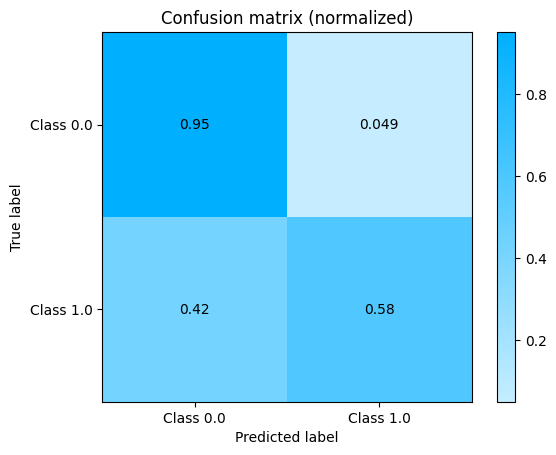

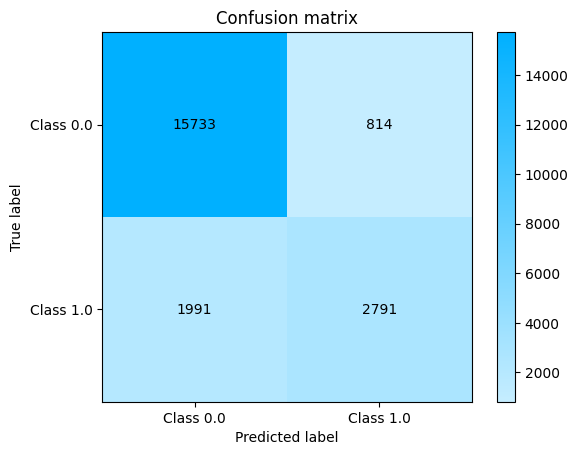

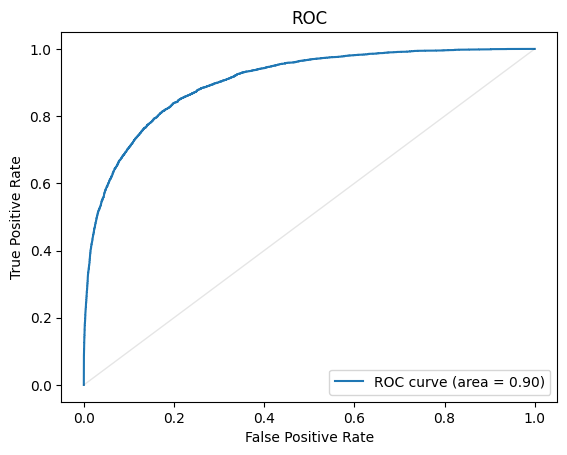

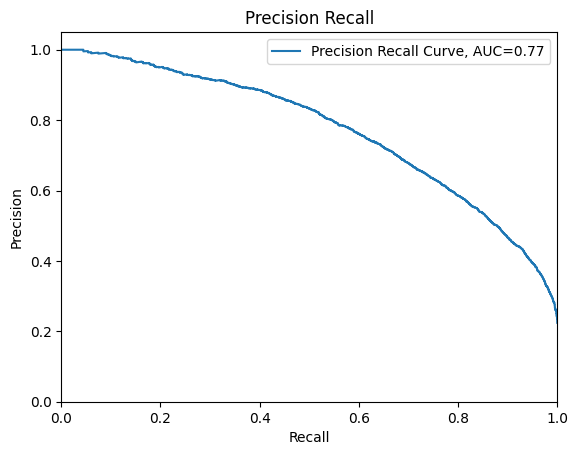

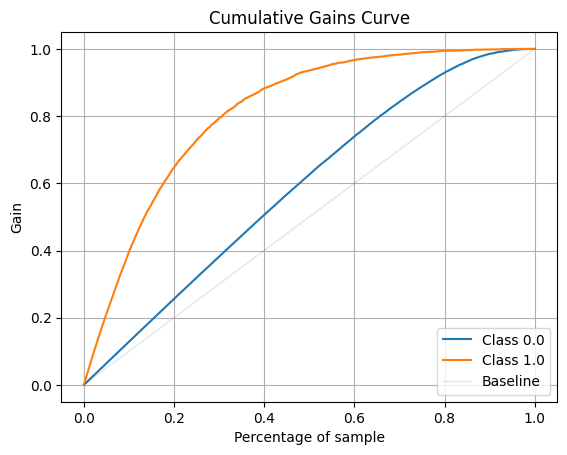

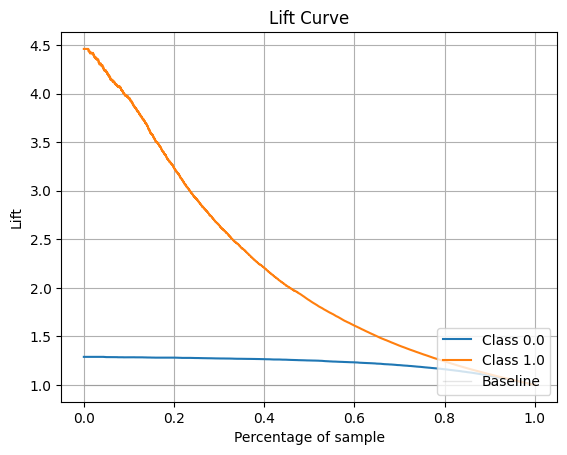

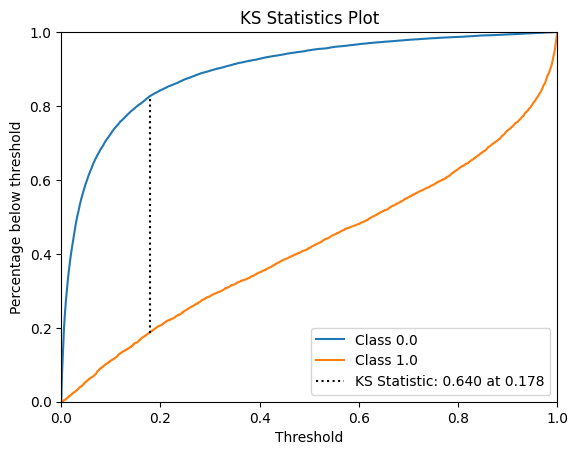

0.8684889118102115
0.7742024965325937
0.5836470096194061
0.6655538333134613


In [66]:
from sklearn_evaluation import plot
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


plt.rcParams['figure.figsize'] = [10, 10]

predictions = model.predict_proba(test)
pre = predictions[:,1] >= .5
df_test['predicted'] = pre
                                        
plot.confusion_matrix(y_test, predictions[:,1] >= .5, normalize=True)
plt.show()
plot.confusion_matrix(y_test, predictions[:,1] >= .5, normalize=False)
plt.show()
plot.roc(y_test, predictions)
plt.show()
plot.precision_recall(y_test,  predictions)
plt.show()

plot.cumulative_gain(y_test, predictions)
plt.show()

plot.cumulative_gain_lift_curve.lift_curve(y_test, predictions)
plt.show()

plot.ks_statistic(y_test, predictions)
plt.show()

print(accuracy_score(y_test, pre))
print(precision_score(y_test, pre))
print(recall_score(y_test, pre))
print(f1_score(y_test, pre))


In [67]:
# xg boost model stats

predictions = model_xgb.predict_proba(X_test_xgb)
pre = predictions[:,1] >= .5
X_test_xgb['predicted'] = pre

print(accuracy_score(y_test_xgb, pre))
print(precision_score(y_test_xgb, pre))
print(recall_score(y_test_xgb, pre))
print(f1_score(y_test_xgb, pre))

C:\Users\cappr\AppData\Local\Programs\Python\Python310\lib\site-packages\feature_engine\encoding\base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) WindGustDir, WindDir9am, WindDir3pm.
  warnings.warn(


0.870635395056085
0.7658821078941888
0.5900192554557124
0.666545817094172


In [68]:
train_cols

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Month', 'Day', 'DayOfWeek', 'MonthlyMinTemp',
       'MonthlyMaxTemp', 'MonthlyRainfall', 'MonthlyEvaporation',
       'MonthlySunshine', 'MonthlyWindGustSpeed', 'MonthlyWindSpeed9am',
       'MonthlyWindSpeed3pm', 'MonthlyHumidity9am', 'MonthlyHumidity3pm',
       'MonthlyPressure9am', 'MonthlyPressure3pm', 'MonthlyCloud9am',
       'MonthlyCloud3pm', 'MonthlyTemp9am', 'MonthlyTemp3pm', 'MonthlyDay',
       'MonthlyDayOfWeek', 'RainPast5Days', 'AvgMaxTemp5Days',
       'AvgSunshine5Days', 'AvgRainfall5Days'],
      dtype='object')

In [69]:
!pip install sklearn-evaluation

In [70]:
!pip install --upgrade matplotlib --user

In [71]:
from importlib import reload
import matplotlib
reload(matplotlib)

<module 'matplotlib' from 'C:\\Users\\cappr\\AppData\\Roaming\\Python\\Python310\\site-packages\\matplotlib\\__init__.py'>

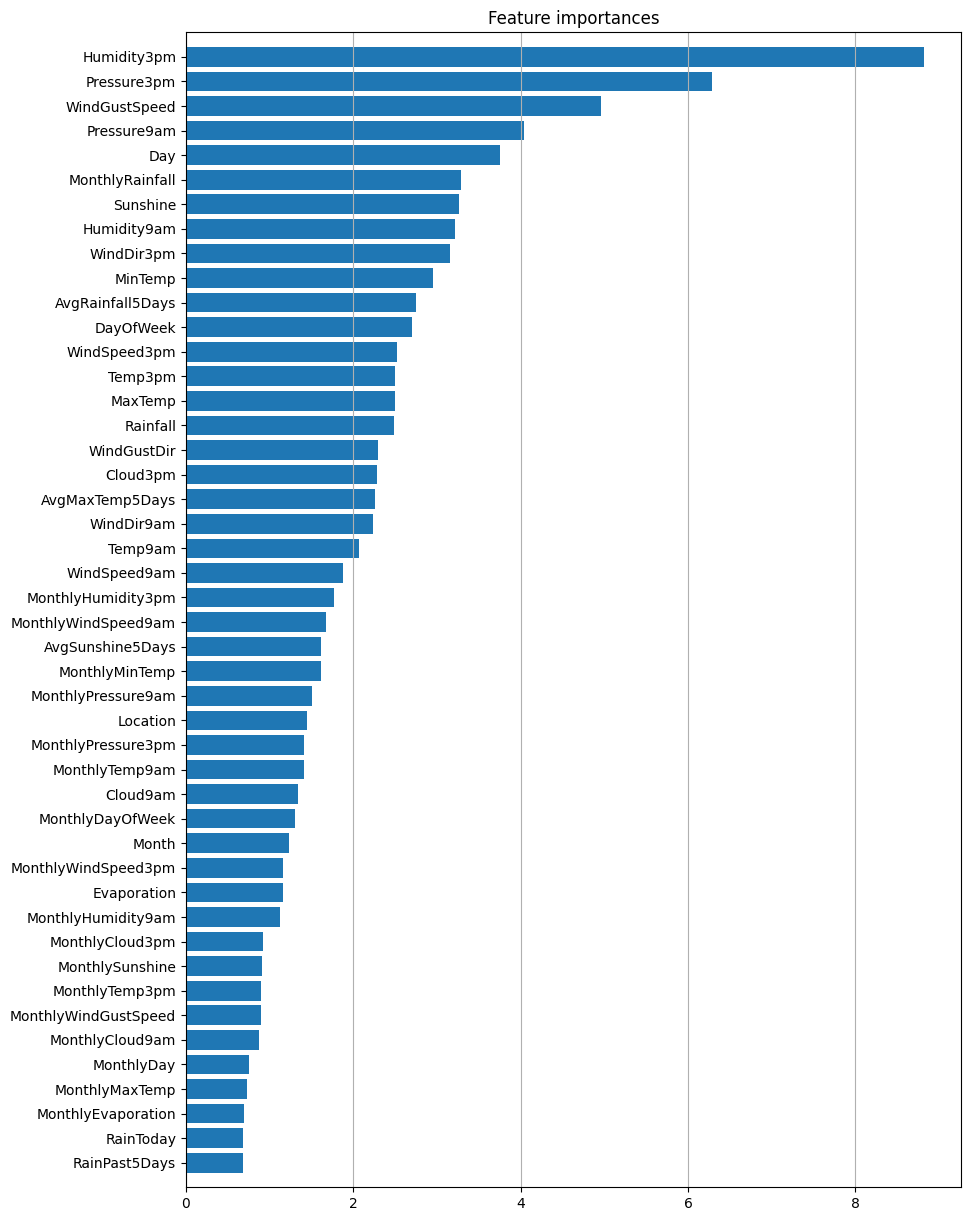

In [72]:
from sklearn_evaluation import plot
plt.figure(figsize=(10, 15))
plot.feature_importances(model.steps[1][1], feature_names=train_cols)
plt.show()

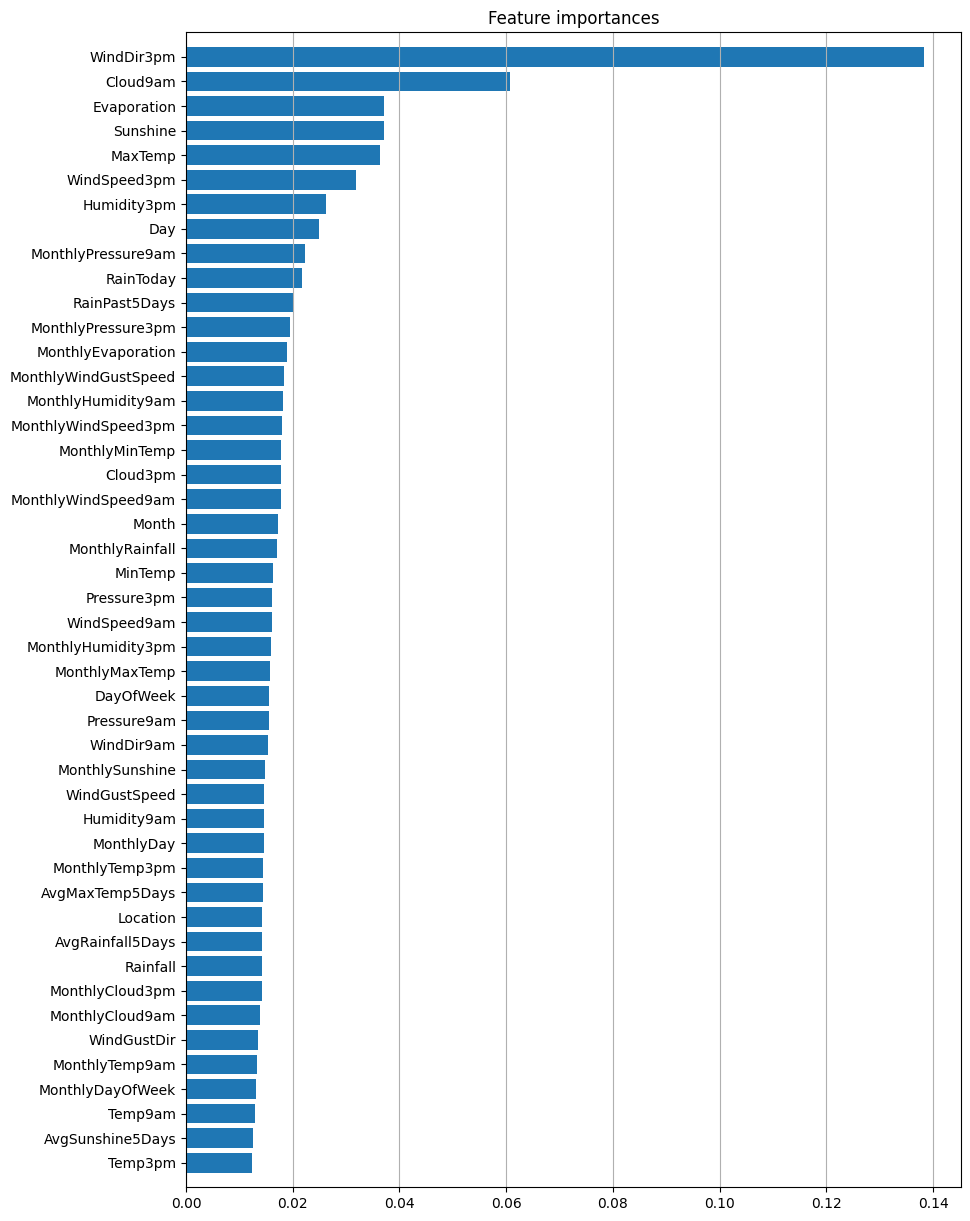

In [73]:
# feature importances graph for xgb
from sklearn_evaluation import plot
plt.figure(figsize=(10, 15))
plot.feature_importances(model_xgb.steps[1][1], feature_names=train_cols)
plt.show()